# Data Load

In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
#load the data
os.chdir(r"C:\Users\ManosIeronymakisProb\OneDrive - Probability\Bureaublad\thesis temporary\PRO\MI4\CMPNY_ESG_CORE\W365_UDAI")
filepath = "merged_data_ESG_with_PermIDs.csv"
filepath1 = "fast_SNP500_data.csv"

# slow and fast ESG scores anualised
merged_df = pd.read_csv(filepath)

#fast ESG scores in daily format
fast_data = pd.read_csv(filepath1)

# Missing values

In [4]:
# Calculate the total number of columns in merged_df
total_columns = len(merged_df.columns)

# Calculate the threshold for missing data
threshold = total_columns * 0.2

# Count the number of missing values in each row
missing_values_per_row = merged_df.isnull().sum(axis=1)

# Filter rows with less than 20% missing data
rows_less_than_20_percent_missing = merged_df[missing_values_per_row < threshold]

# Print the number of rows with less than 20% missing data
print("Number of rows with less than 20% missing data:", len(rows_less_than_20_percent_missing))

# Create a new DataFrame with rows that have less than 20% missing data
df_less_than_20_percent_missing = rows_less_than_20_percent_missing.copy()

Number of rows with less than 20% missing data: 392


# Index level corellation through time

Correlation coefficients between slow and fast data:
[0.13945542 0.17665877 0.24441262 0.22014484 0.29133018 0.3189273
 0.35369355 0.3628914  0.38064052 0.38681059 0.36025343 0.35706191
 0.36815207 0.40515678 0.32729776 0.26516889 0.2690676  0.21079383
 0.1944941  0.18378327]


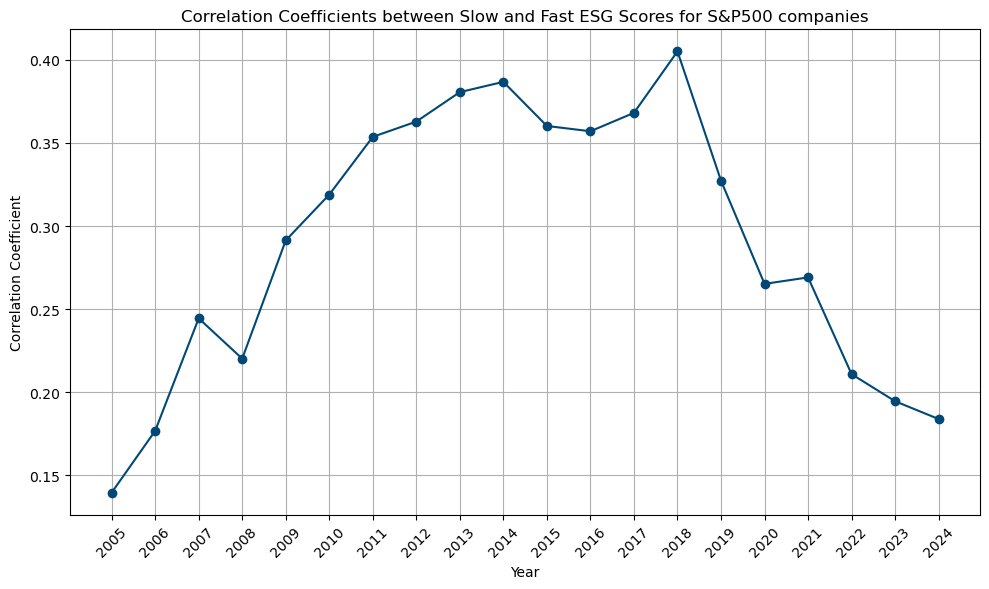

In [5]:
# List to store correlation coefficients
correlation_coefficients = []

# Iterate over the years
for year in range(2005, 2025):
    # Extract slow and fast ESG score columns for the current year
    slow_column = '{}S'.format(year)
    fast_column = '{}F'.format(year)
    
    # Calculate correlation coefficient between slow and fast scores for the current year
    correlation_coefficient = merged_df[[slow_column, fast_column]].corr().iloc[0, 1]
    
    # Append the correlation coefficient to the list
    correlation_coefficients.append(correlation_coefficient)

# Convert correlation coefficients list to numpy array
correlation_coefficients = np.array(correlation_coefficients)

# Print the correlation coefficients
print("Correlation coefficients between slow and fast data:")
print(correlation_coefficients)


#linear plot

# Years range from 2005 to 2024
years = range(2005, 2025)

# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
plt.plot(years, correlation_coefficients, marker='o', color='#004976')
plt.title('Correlation Coefficients between Slow and Fast ESG Scores for S&P500 companies')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

# Company level corelation through time

In [4]:
# List to store correlation coefficients for each company
company_correlations = []

# Iterate over each row (company) in merged_df
for index, row in merged_df.iterrows():
    # Extract company name
    company_name = row['Company_Name']
    
    # Initialize lists to store slow and fast ESG scores for the current company
    slow_scores = []
    fast_scores = []
    
    # Iterate over years from 2005 to 2024
    for year in range(2005, 2025):
        # Extract slow and fast ESG scores for the current year
        slow_score = row[str(year) + 'S']
        fast_score = row[str(year) + 'F']
        
        # Append the scores to the respective lists
        slow_scores.append(slow_score)
        fast_scores.append(fast_score)
    
    # Calculate correlation coefficient between slow and fast scores for the current company
    correlation = pd.Series(slow_scores).corr(pd.Series(fast_scores))
    
    # Append the correlation coefficient along with the company name to the list
    company_correlations.append({'Company_Name': company_name, 'Correlation': correlation})

# Create a new DataFrame with correlation coefficients for each company
company_correlations_df = pd.DataFrame(company_correlations)

# Print the new DataFrame
print(company_correlations_df)

                       Company_Name  Correlation
0                         Aflac Inc     0.489264
1                          AES Corp     0.414237
2               Abbott Laboratories    -0.145801
3                         Adobe Inc     0.071567
4        Advanced Micro Devices Inc    -0.346489
..                              ...          ...
489       Constellation Energy Corp     1.000000
490  GE Healthcare Technologies Inc          NaN
491                      Kenvue Inc          NaN
492                    Veralto Corp          NaN
493                  GE Vernova Inc          NaN

[494 rows x 2 columns]


C:\Users\ManosIeronymakisProb\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ManosIeronymakisProb\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [5]:
## find the correlation category
# Define thresholds
strong_threshold = 0.6
medium_threshold_low = 0.2
weak_threshold = 0.0
negative_threshold = -0.2

# Count the number of companies with strong, medium, weak, and negative correlation
strong_correlation_count = ((company_correlations_df['Correlation'] > strong_threshold)).sum()
medium_correlation_count = ((company_correlations_df['Correlation'] >= medium_threshold_low) & (company_correlations_df['Correlation'] < strong_threshold)).sum()
weak_correlation_count = ((company_correlations_df['Correlation'] >= weak_threshold) & (company_correlations_df['Correlation'] < medium_threshold_low)).sum()
negative_correlation_count = (company_correlations_df['Correlation'] < negative_threshold).sum()

# Print the counts
print("Number of companies with strong correlation:", strong_correlation_count)
print("Number of companies with medium correlation:", medium_correlation_count)
print("Number of companies with weak correlation:", weak_correlation_count)
print("Number of companies with negative correlation:", negative_correlation_count)

Number of companies with strong correlation: 121
Number of companies with medium correlation: 185
Number of companies with weak correlation: 69
Number of companies with negative correlation: 63


In [8]:
## create 4 new datafarmes based the correlation category
# Filter rows for strong correlations
strong_correlation_df = company_correlations_df[company_correlations_df['Correlation'] > strong_threshold]

# Filter rows for medium correlations
medium_correlation_df = company_correlations_df[(company_correlations_df['Correlation'] >= medium_threshold_low) & (company_correlations_df['Correlation'] < strong_threshold)]

# Filter rows for weak correlations
weak_correlation_df = company_correlations_df[(company_correlations_df['Correlation'] >= weak_threshold) & (company_correlations_df['Correlation'] < medium_threshold_low)]

# Filter rows for negative correlations
negative_correlation_df = company_correlations_df[company_correlations_df['Correlation'] < negative_threshold]

In [7]:
# Extract unique Company_Name values from correlation DataFrames
strong_companies = strong_correlation_df['Company_Name'].unique()
medium_companies = medium_correlation_df['Company_Name'].unique()
weak_companies = weak_correlation_df['Company_Name'].unique()
negative_companies = negative_correlation_df['Company_Name'].unique()

In [9]:
## create 4 new datafarmes based the correlation category and the fast and slow data
strong_correlation_df_companies = merged_df[merged_df['Company_Name'].isin(strong_companies)]
medium_correlation_df_companies = merged_df[merged_df['Company_Name'].isin(medium_companies)]
weak_correlation_df_companies = merged_df[merged_df['Company_Name'].isin(weak_companies)]
negative_correlation_df_companies = merged_df[merged_df['Company_Name'].isin(negative_companies)]

High Correlation Correlation Coefficient (R-value): 0.5740984504273111
Moderate Correlation Correlation Coefficient (R-value): 0.39085500849454685
Low Correlation Correlation Coefficient (R-value): 0.28822305470297904
Negative Correlation Correlation Coefficient (R-value): -0.06703082946627317


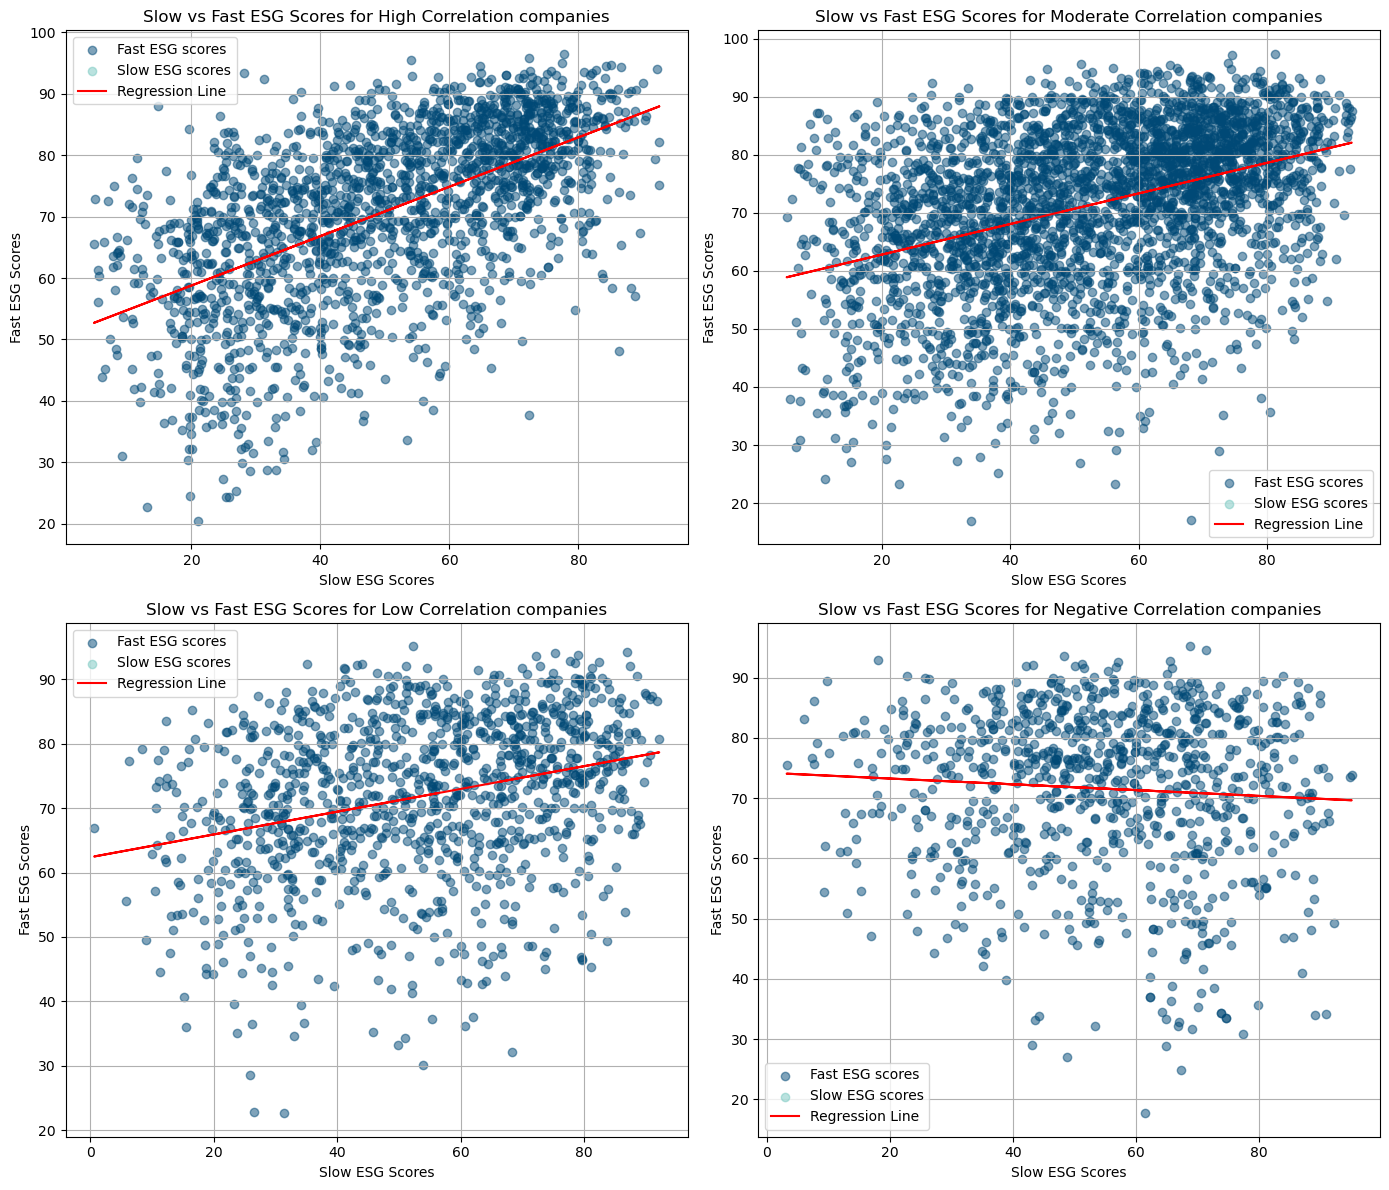

In [10]:
#plotting the corellation companies

# Define the years for slow ESG data (2005S-2024S) and fast ESG data (2005F-2024F)
slow_years = [f'{year}S' for year in range(2005, 2025)]
fast_years = [f'{year}F' for year in range(2005, 2025)]

# Dictionary to hold the dataframes and their titles
correlation_data = {
    'High Correlation': strong_correlation_df_companies,
    'Moderate Correlation': medium_correlation_df_companies,
    'Low Correlation': weak_correlation_df_companies,
    'Negative Correlation': negative_correlation_df_companies
}

# Colors for the plots
fast_color = '#004976'
slow_color = '#76C7C0'
line_color = 'red'

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

# Iterate over the correlation categories
for i, (title, df) in enumerate(correlation_data.items()):
    # Extract the S and F values for the current DataFrame
    S_values = df[slow_years].values.flatten()
    F_values = df[fast_years].values.flatten()
    
    # Filter out NaN values
    valid_indices = ~np.isnan(S_values) & ~np.isnan(F_values)
    S_values = S_values[valid_indices]
    F_values = F_values[valid_indices]
    
    # Perform linear regression using scipy.stats.linregress
    slope, intercept, r_value, p_value, std_err = linregress(S_values, F_values)
    
    # Plot the S vs F values
    axs[i].scatter(S_values, F_values, color=fast_color, alpha=0.5, label='Fast ESG scores')
    
    # Add fake scatter points for Slow ESG Scores for legend
    axs[i].scatter([], [], color=slow_color, alpha=0.5, label='Slow ESG scores')
    
    axs[i].plot(S_values, slope * S_values + intercept, color=line_color, linestyle='-', label='Regression Line')

    
    axs[i].set_title(f'Slow vs Fast ESG Scores for {title} companies')
    axs[i].set_xlabel('Slow ESG Scores')
    axs[i].set_ylabel('Fast ESG Scores')
    axs[i].grid(True)
    axs[i].legend()
    
    # Print the correlation coefficient for each plot
    print(f"{title} Correlation Coefficient (R-value): {r_value}")

plt.tight_layout()
plt.show()

# Sociall media attention (Buzz)

In [11]:
# Create the four new dataframes by filtering fast_data based on the PermID in the respective correlation dataframes
strong_correlation_df_companies_fast = fast_data[fast_data['assetCode'].isin(strong_correlation_df_companies['PermID'])]
medium_correlation_df_companies_fast = fast_data[fast_data['assetCode'].isin(medium_correlation_df_companies['PermID'])]
weak_correlation_df_companies_fast = fast_data[fast_data['assetCode'].isin(weak_correlation_df_companies['PermID'])]
negative_correlation_df_companies_fast = fast_data[fast_data['assetCode'].isin(negative_correlation_df_companies['PermID'])]


# Calculate the sum of the 'buzz' column for each new dataframe
strong_buzz_sum = strong_correlation_df_companies_fast['buzz'].sum()
medium_buzz_sum = medium_correlation_df_companies_fast['buzz'].sum()
weak_buzz_sum = weak_correlation_df_companies_fast['buzz'].sum()
negative_buzz_sum = negative_correlation_df_companies_fast['buzz'].sum()

# Print the results
print(f"Strong Correlation Companies Fast Data Buzz Sum: {strong_buzz_sum}")
print(f"Medium Correlation Companies Fast Data Buzz Sum: {medium_buzz_sum}")
print(f"Weak Correlation Companies Fast Data Buzz Sum: {weak_buzz_sum}")
print(f"Negative Correlation Companies Fast Data Buzz Sum: {negative_buzz_sum}")

Strong Correlation Companies Fast Data Buzz Sum: 3124965896.5
Medium Correlation Companies Fast Data Buzz Sum: 12208601014.5
Weak Correlation Companies Fast Data Buzz Sum: 6367579180.0
Negative Correlation Companies Fast Data Buzz Sum: 14024474080.5


# Industry Categories

In [12]:
# Get the unique values in the 'industryName' column for each dataframe
strong_industry_unique = strong_correlation_df_companies_fast['industryName'].unique().tolist()
medium_industry_unique = medium_correlation_df_companies_fast['industryName'].unique().tolist()
weak_industry_unique = weak_correlation_df_companies_fast['industryName'].unique().tolist()
negative_industry_unique = negative_correlation_df_companies_fast['industryName'].unique().tolist()

In [13]:
# Get all unique industry names from the four dataframes and convert to list
unique_industries = list(set(strong_industry_unique + medium_industry_unique + weak_industry_unique + negative_industry_unique))

# Create an empty dataframe with the unique industries as rows and the correlation types as columns
industry_matrix_unique = pd.DataFrame(index=unique_industries, columns=['Strong Correlation', 'Medium Correlation', 'Weak Correlation', 'Negative Correlation'])

# Define a function to count unique assetCode entries for each industryName
def count_unique_industries(df):
    return df[['assetCode', 'industryName']].drop_duplicates()['industryName'].value_counts()

# Fill in the matrix by counting the unique occurrences of each industry name in each dataframe
industry_matrix_unique['Strong Correlation'] = [count_unique_industries(strong_correlation_df_companies_fast).get(industry, 0) for industry in unique_industries]
industry_matrix_unique['Medium Correlation'] = [count_unique_industries(medium_correlation_df_companies_fast).get(industry, 0) for industry in unique_industries]
industry_matrix_unique['Weak Correlation'] = [count_unique_industries(weak_correlation_df_companies_fast).get(industry, 0) for industry in unique_industries]
industry_matrix_unique['Negative Correlation'] = [count_unique_industries(negative_correlation_df_companies_fast).get(industry, 0) for industry in unique_industries]

# Display the matrix
print(industry_matrix_unique)

                                                  Strong Correlation  \
Leisure Products                                                   0   
Communications & Networking                                        3   
Renewable Energy                                                   1   
Oil & Gas Related Equipment and Services                           1   
Water & Related Utilities                                          0   
Machinery, Tools, Heavy Vehicles, Trains & Ships                   7   
Investment Banking & Investment Services                           2   
Natural Gas Utilities                                              1   
Beverages                                                          1   
Food & Drug Retailing                                              3   
Office Equipment                                                   0   
Unknown                                                            6   
Metals & Mining                                                 

# Controversies scores

In [14]:
# List of columns for which you want to calculate the average
columns_to_average = ['ESG', 'ESGCombined', 'ESGControversies', 'EnvironmentalPillar', 'GovernancePillar', 'SocialPillar', 'CSRStrategy', 'Community', 'Emissions', 'EnvironmentalInnovation', 'HumanRights', 'Management', 'ProductResponsibility', 'ResourceUse', 'Shareholders', 'Workforce']

# Initialize dictionaries to store the average values for each column
strong_avg = {}
medium_avg = {}
weak_avg = {}
negative_avg = {}

# Calculate the average for each column in the list
for column in columns_to_average:
    strong_avg[column] = strong_correlation_df_companies_fast[column].mean()
    medium_avg[column] = medium_correlation_df_companies_fast[column].mean()
    weak_avg[column] = weak_correlation_df_companies_fast[column].mean()
    negative_avg[column] = negative_correlation_df_companies_fast[column].mean()

# Print the results
print("Strong Correlation Companies Fast Data Averages:")
for column, avg in strong_avg.items():
    print(f"{column}: {avg}")

print("\nMedium Correlation Companies Fast Data Averages:")
for column, avg in medium_avg.items():
    print(f"{column}: {avg}")

print("\nWeak Correlation Companies Fast Data Averages:")
for column, avg in weak_avg.items():
    print(f"{column}: {avg}")

print("\nNegative Correlation Companies Fast Data Averages:")
for column, avg in negative_avg.items():
    print(f"{column}: {avg}")

# # Assuming the dataframe is named df
# columns_list = fast_data.columns.tolist()

# # Print the list of column headers
# print(columns_list)


# Create a dataframe to store these results
averages_df = pd.DataFrame({
    'Strong Correlation': strong_avg,
    'Medium Correlation': medium_avg,
    'Weak Correlation': weak_avg,
    'Negative Correlation': negative_avg
})

# Display the dataframe
print(averages_df)

Strong Correlation Companies Fast Data Averages:
ESG: 67.87085216848494
ESGCombined: 55.13184409412265
ESGControversies: 44.58138555899583
EnvironmentalPillar: 63.74715977663877
GovernancePillar: 69.85068749271724
SocialPillar: 70.50636605435848
CSRStrategy: 63.62781803681461
Community: 79.68796037175122
Emissions: 62.0406411513968
EnvironmentalInnovation: 69.06931949691028
HumanRights: 64.15812726107467
Management: 74.14425673553978
ProductResponsibility: 68.94105991353344
ResourceUse: 64.15999601581845
Shareholders: 60.51907551708967
Workforce: 71.91660643333164

Medium Correlation Companies Fast Data Averages:
ESG: 69.56765919835227
ESGCombined: 54.82065260580112
ESGControversies: 41.185999140454584
EnvironmentalPillar: 66.22040946106462
GovernancePillar: 70.14332598515793
SocialPillar: 72.39930039686371
CSRStrategy: 61.60438301799837
Community: 79.87973387797628
Emissions: 63.86523517563079
EnvironmentalInnovation: 72.09435551741021
HumanRights: 65.664979564584
Management: 74.77403

# Market Cap analysis

In [15]:
import pandas as pd
import numpy as np

# Calculate total market cap and the target market cap per group
total_marketcap = merged_df["Marketcap(B)"].sum()
target_marketcap_per_group = total_marketcap / 3

# Sort the dataframe by market cap in descending order
sorted_merged_df = merged_df.sort_values(by="Marketcap(B)", ascending=False)

# Initialize variables for the groups
high_marketcap_companies = []
medium_marketcap_companies = []
low_marketcap_companies = []

# Initialize variables to keep track of the current market cap sum
current_marketcap_sum = 0

# Assign companies to the high market cap group until the target is reached
for index, row in sorted_merged_df.iterrows():
    if current_marketcap_sum + row["Marketcap(B)"] <= target_marketcap_per_group:
        high_marketcap_companies.append(row)
        current_marketcap_sum += row["Marketcap(B)"]
    else:
        break

# Convert to DataFrame
high_marketcap_df = pd.DataFrame(high_marketcap_companies)

# Remove the high market cap companies from the sorted DataFrame
sorted_merged_df = sorted_merged_df.iloc[len(high_marketcap_df):]

# Reset current market cap sum for the next group
current_marketcap_sum = 0

# Assign companies to the medium market cap group until the target is reached
for index, row in sorted_merged_df.iterrows():
    if current_marketcap_sum + row["Marketcap(B)"] <= target_marketcap_per_group:
        medium_marketcap_companies.append(row)
        current_marketcap_sum += row["Marketcap(B)"]
    else:
        break

# Convert to DataFrame
medium_marketcap_df = pd.DataFrame(medium_marketcap_companies)

# Remove the medium market cap companies from the sorted DataFrame
sorted_merged_df = sorted_merged_df.iloc[len(medium_marketcap_df):]

# The remaining companies are assigned to the low market cap group
low_marketcap_df = sorted_merged_df

# Print the number of companies in each group
num_high_marketcap_companies = len(high_marketcap_df)
num_medium_marketcap_companies = len(medium_marketcap_df)
num_low_marketcap_companies = len(low_marketcap_df)

print("Number of high marketcap companies:", num_high_marketcap_companies)
print("Number of medium marketcap companies:", num_medium_marketcap_companies)
print("Number of low marketcap companies:", num_low_marketcap_companies)


column_sum = low_marketcap_df['Marketcap(B)'].sum()

print("Sum of the column:", column_sum)

Number of high marketcap companies: 12
Number of medium marketcap companies: 73
Number of low marketcap companies: 409
Sum of the column: 13883.04


In [16]:
# Function to count companies in each correlation category
def count_companies_by_correlation(marketcap_df, correlation_dfs):
    count_dict = {'Strong': 0, 'Moderate': 0, 'Weak': 0, 'Negative': 0}
    for correlation_df, category in zip(correlation_dfs, count_dict.keys()):
        count_dict[category] = marketcap_df[marketcap_df['Company_Name'].isin(correlation_df['Company_Name'])].shape[0]
    return count_dict

# Correlation dataframes list
correlation_dfs = [strong_correlation_df_companies, medium_correlation_df_companies, weak_correlation_df_companies, negative_correlation_df_companies]

# Count companies for each market cap category
high_counts = count_companies_by_correlation(high_marketcap_df, correlation_dfs)
medium_counts = count_companies_by_correlation(medium_marketcap_df, correlation_dfs)
low_counts = count_companies_by_correlation(low_marketcap_df, correlation_dfs)

# Create final dataframe
final_df = pd.DataFrame({
    'Market Cap': ['High (2.8T-468B)', 'Medium (468B-98B)', 'Low (98B-2.13B)'],
    'Strong': [high_counts['Strong'], medium_counts['Strong'], low_counts['Strong']],
    'Moderate': [high_counts['Moderate'], medium_counts['Moderate'], low_counts['Moderate']],
    'Weak': [high_counts['Weak'], medium_counts['Weak'], low_counts['Weak']],
    'Negative': [high_counts['Negative'], medium_counts['Negative'], low_counts['Negative']]
})

print(final_df)


          Market Cap  Strong  Moderate  Weak  Negative
0   High (2.8T-468B)       2         5     2         3
1  Medium (468B-98B)      10        19    12        16
2    Low (98B-2.13B)     109       161    55        44
